In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [5]:
img = Image.open('Data_Problem_1_Sai_Thatigotla.jpg').convert('L')

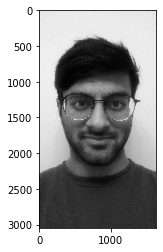

In [6]:
plt.imshow(img, cmap='gray')

In [7]:
pic = np.array(img)

In [8]:
pic

array([[225, 225, 225, ..., 225, 225, 226],
       [225, 225, 225, ..., 225, 226, 226],
       [225, 225, 225, ..., 226, 226, 226],
       ...,
       [ 52,  54,  56, ...,  48,  47,  47],
       [ 51,  54,  55, ...,  49,  49,  49],
       [ 50,  53,  54, ...,  49,  49,  50]], dtype=uint8)

In [9]:
pic.shape

(3046, 1632)

In [10]:
u,s,v = np.linalg.svd(pic)

In [11]:
u.shape[1]

3046

In [12]:
sigma = np.zeros((u.shape[1], v.shape[0]))
for i in range(min(u.shape[1], v.shape[0])):
    sigma[i, i] = s[i]

In [13]:
s.shape

(1632,)

In [14]:
sigma.shape

(3046, 1632)

In [15]:
v.shape

(1632, 1632)

In [16]:
u[:, 0:2].shape

(3046, 2)

In [17]:
v[0:2, :].shape

(2, 1632)

In [18]:
orig_size = (u.shape[0]*u.shape[1])+(sigma.shape[0]*sigma.shape[1]) + (v.shape[0] * v.shape[1])
print(orig_size)

16912612


In [19]:
def compress(u, s, v, rank):
    new_sigma = np.zeros((u[:, 0:rank].shape[1], v[0:rank, :].shape[0]))
    for i in range(min(u[:, 0:rank].shape[1], v[0:rank, :].shape[0])):
        new_sigma[i, i] = s[i]
    new_img = np.dot(u[:, 0:rank], np.dot(new_sigma, v[0:rank, :]))
    size = (u[:, 0:rank].shape[0]*u[:, 0:rank].shape[1])+(new_sigma.shape[0]*new_sigma.shape[1]) + (v[0:rank, :].shape[0] * v[0:rank, :].shape[1])
    return size, new_img

In [23]:
ranks = [1, 5, 10, 20, 40, 60, 80, 100, 150, 175, 200, 400, 500, 800, 1100, 1600]

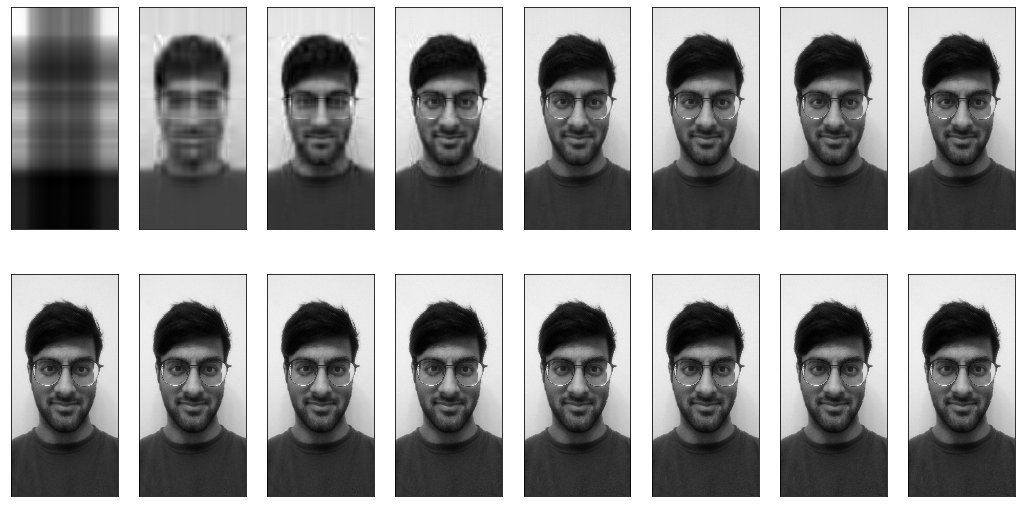

In [31]:
nrows = 2
ncols = 8
fig, axes = plt.subplots(nrows, ncols, figsize=(18,9))
i = 0
szs = []
for i, row in enumerate(axes.flat):
    sz,new_pic= compress(u, s, v, ranks[i])
    szs.append(sz)
    row.imshow(new_pic, cmap='gray', aspect='auto')
    row.grid(False)
    #i += 1
    #sz,new_pic= compress(u, s, v, ranks[i])
    #szs.append(sz)
    #row[1].imshow(new_pic, cmap='gray')
    #i += 1
    #row.yaxis.set_ticks_position("right")
    #row.xaxis.set_ticks_position("top")
    row.set_xticks([])
    row.set_yticks([])
plt.grid(False)
plt.show()

In [32]:
compress(u, s, v, 40)

(188720, array([[226.14691093, 226.07039273, 226.10073154, ..., 223.1447619 ,
         223.13679797, 223.17663327],
        [226.15298097, 226.07785418, 226.10906683, ..., 223.27101789,
         223.25957667, 223.2966521 ],
        [225.93776331, 225.86233232, 225.89241597, ..., 223.2197637 ,
         223.19916925, 223.22958543],
        ...,
        [ 52.2517568 ,  52.19559723,  52.13907684, ...,  49.87302678,
          49.83446204,  49.79426654],
        [ 51.95621588,  51.89681375,  51.843441  , ...,  50.0849029 ,
          50.06186048,  50.01869444],
        [ 51.24850565,  51.19355433,  51.14910912, ...,  49.88582941,
          49.87061368,  49.84304858]]))

In [85]:
szs = np.array(szs)

In [86]:
szs.shape[0]

14

In [92]:
test_ranks = np.arange(1, 1600, step=5)

In [93]:
vals = []
for i in test_ranks:
    sz,new_pic= compress(u, s, v, i)
    vals.append(sz)

In [98]:
vals

[4679,
 28104,
 51579,
 75104,
 98679,
 122304,
 145979,
 169704,
 193479,
 217304,
 241179,
 265104,
 289079,
 313104,
 337179,
 361304,
 385479,
 409704,
 433979,
 458304,
 482679,
 507104,
 531579,
 556104,
 580679,
 605304,
 629979,
 654704,
 679479,
 704304,
 729179,
 754104,
 779079,
 804104,
 829179,
 854304,
 879479,
 904704,
 929979,
 955304,
 980679,
 1006104,
 1031579,
 1057104,
 1082679,
 1108304,
 1133979,
 1159704,
 1185479,
 1211304,
 1237179,
 1263104,
 1289079,
 1315104,
 1341179,
 1367304,
 1393479,
 1419704,
 1445979,
 1472304,
 1498679,
 1525104,
 1551579,
 1578104,
 1604679,
 1631304,
 1657979,
 1684704,
 1711479,
 1738304,
 1765179,
 1792104,
 1819079,
 1846104,
 1873179,
 1900304,
 1927479,
 1954704,
 1981979,
 2009304,
 2036679,
 2064104,
 2091579,
 2119104,
 2146679,
 2174304,
 2201979,
 2229704,
 2257479,
 2285304,
 2313179,
 2341104,
 2369079,
 2397104,
 2425179,
 2453304,
 2481479,
 2509704,
 2537979,
 2566304,
 2594679,
 2623104,
 2651579,
 2680104,
 270867

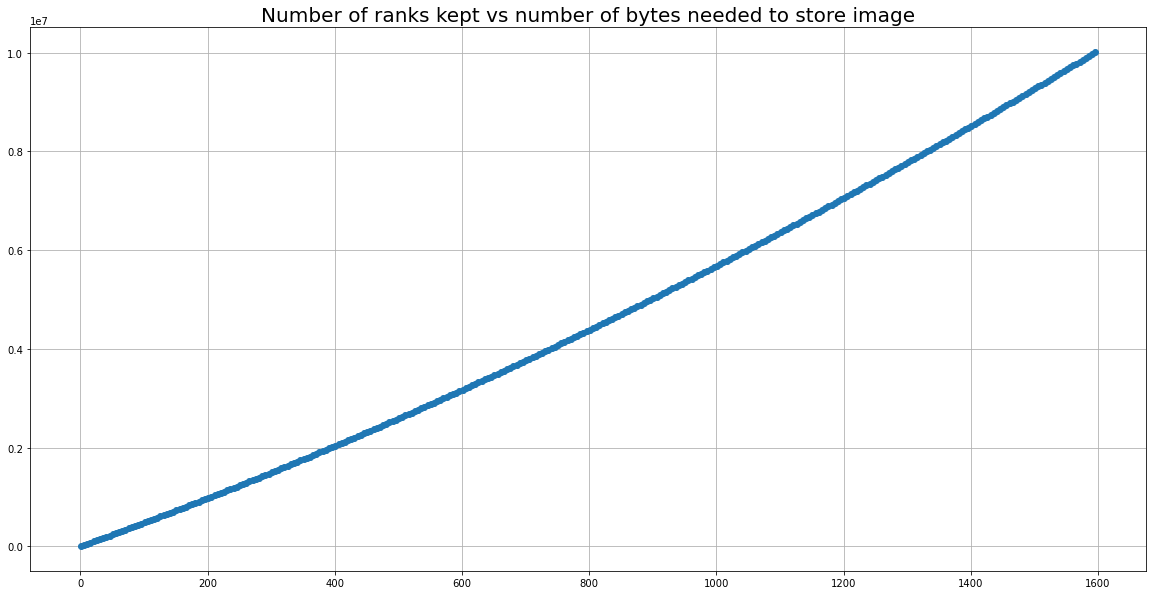

In [104]:
plt.figure(1, figsize=(20,10))
plt.plot(test_ranks, vals, marker='o', linestyle='--')
plt.title('Number of ranks kept vs number of bytes needed to store image', fontsize=20)
plt.grid()
plt.show()

In [103]:
kn = KneeLocator(np.array(ranks), szs, curve='convex', direction='increasing')
print(kn.knee)

40
